<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 100px">

# Project 3: Web APIs & NLP

# Part 1: P. Statement, Background, Data Collection, Data Cleaning, NLP, and EDA

### Contents:
- [Problem Statement/Background](#Problem-Statement-/-Background)
- [Data Collection](#Data-Collection)
    - [1st Subreddit - /r/stocks](#Data-collection-for-1st-Subreddit---/r/stocks)
    - [2nd Subreddit - /r/CryptoCurrency](#Data-collection-for-2nd-Subreddit---/r/CryptoCurrency)
- [Data Cleaning](#Data-Cleaning)
    - [1st Subreddit - /r/stocks](#Data-cleaning-for-1st-Subreddit---/r/stocks)
    - [2nd Subreddit - /r/CryptoCurrency](#Data-cleaning-for-2nd-Subreddit---/r/CryptoCurrency)
    - [Data Cleaning via Natural Language Processing (NLP) techniques](#Data-Cleaning-via-Natural-Language-Processing-Techniques)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis-(EDA))

## Problem Statement / Background

### Problem Statement

This project aims to apply machine learning techniques to curate and flag irrelevant content posts within each subreddit so as to improve the quality of users’ experience and grow the active user base for better advertising revenue potential.

In classifying the posts, we also want to mitigate the risk of losing users to inappropriate removal of posts when they are actually relevant to the thread.

### Background

**Situation on Reddit in the year 2020**
1. 52 Million Daily Users
2. 303.4 Million posts
3. 49.2 Billion Upvotes

There are so many users using Reddit, as suggested by the statistics above. One of the reasons is that content optimsation is being emphasised in Reddit, and this is a cornerstone with high impact on user retention, engagement and growth. In the year 2020, there are more than 100 million posts removed in 2020 by moderators.

There are 2 types of moderators in Reddit.
1) **Human Moderator**
- There are >70,000 volunteers who volunteer their time to help guide and create Reddit's many communities.
- They are able to do the followings:
    - Report or remove comments or submissions containing certain words or phrases.
    - Ban spammers or other redditors who may be breaking community rules from posting or commenting in their community.


2) **Auto Moderator**
- Auto moderator tool is introduced in 2019. 
- It is a system built into reddit that allows moderators to define "rules" to be automatically applied to posts in their subreddit.
- The Auto Moderator is able to report or remove comments or submissions containing certain words or phrases.

In order to improve moderation efforts and content optimsation to make a more vibrant reddit community, we can:
1) Scope to further curate posts for relevance, as relevant posts keep users reading and engaged.

2) Ease the moderation work by leveraging on machine learning tools to help moderators complete key tasks with less time. We can also do so by having more moderators stepping up to support communities.




## Data Collection

### Data collection for 1st Subreddit - /r/stocks

#### 1. Import all necessary libraries

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import datetime as dt
import re
import string
import nltk
import gensim

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

C:\Users\chiay\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# Setting to see max columns and rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#### 2. Pull the Subreddit data Using Pushshift API

In [3]:
# Store the url of the reddit page into 'url'
url = 'https://api.pushshift.io/reddit/search/submission'

In [4]:
# Initiate an empty list 'mylist'
mylist = []

# Set the parameters for the pushshift api
params = {
    'size' : 100,
    'subreddit': 'stocks',
    'before':1626851005
}

# Create for loop of 51 times
for i in range(51):

    # Request the data from stock_url using paramaters defined in params
    res = requests.get(url, params)
    
    if res.status_code == 200:               # Only run following codes when res status code == 200, which means it's working.
        data = res.json()                    # Store the data in json form
        stocks = pd.DataFrame(data['data'])  # Store the data pulled into a dataframe 'stocks'
        stocks = stocks[["subreddit", "created_utc", "title", "selftext"]]  # only store data of 4 columns
        mylist.append(stocks)                                               # Append the 'stocks' dataframe into 'mylist' list
        params['before'] = stocks.iloc[-1,1]                                # Set the 'before' of params to be the last 'created_utc'
        time.sleep(10)                                                      # Set sleep timer
    else:
        print('Error! Status Code not 200')                                 # give warning if status code is not 200 (not working)
    
    # Compile all posts into full list    
full_stock = pd.concat(mylist, sort=False)
   

In [5]:
# Print a few rows of dataframe 'full_stock'
full_stock.head()

,subreddit,created_utc,title,selftext
0,stocks,1626851004,Advise on Long Term Stock?,I am earning very little at the moment but I w...
1,stocks,1626847571,Earning plays,[removed]
2,stocks,1626847468,Going long vega? what is the maximum loss?,[removed]
3,stocks,1626847423,Dad told me to sell on Monday when the market ...,"The stocks I chose were aapl, net, asts, icln,..."
4,stocks,1626847066,Newbie trader. Dad told me to sell when the ma...,[removed]


In [6]:
# Check the shape of 'full_stock'
full_stock.shape

(5100, 4)

### Data collection for 2nd Subreddit - /r/CryptoCurrency

#### 1. Pull the Subreddit data Using Pushshift API

In [7]:
# Store the url of the reddit page into 'url'
url = 'https://api.pushshift.io/reddit/search/submission'

In [8]:
# Initiate an empty list 'secondlist'
secondlist = []

# Set the parameters for the pushshift api
params = {
    'size' : 100,
    'subreddit': 'CryptoCurrency',
    'before':1626851005
}

# Create for loop of 51 times
for i in range(51):

    # Request the data from stock_url using paramaters defined in params
    res = requests.get(url, params)
    
    if res.status_code == 200:               # Only run following codes when res status code == 200, which means it's working.
        data = res.json()                    # Store the data in json form
        crypto = pd.DataFrame(data['data'])  # Store the data pulled into a dataframe 'crypto'
        crypto = crypto[["subreddit", "created_utc", "title", "selftext"]]  # only store data of 4 columns
        secondlist.append(crypto)                                           # Append the 'crypto' dataframe into 'secondlist' list
        params['before'] = crypto.iloc[-1,1]                                # Set the 'before' of params to be the last 'created_utc'
        time.sleep(10)                                                       # Set sleep timer
    else:
        print('Error! Status Code not 200')                                 # give warning if status code is not 200 (not working)
    
    # Compile all posts into full list    
full_crypto = pd.concat(secondlist, sort=False)

In [9]:
# Print a few rows of dataframe 'full_crypto'
full_crypto.head()

,subreddit,created_utc,title,selftext
0,CryptoCurrency,1626850949,Should I create a gymkhana with all my cryptoc...,"Hello everyone, yesterday I was thinking about..."
1,CryptoCurrency,1626850702,A country’s ban on crypto is only valid if you...,So I don’t understand why countries can ban cr...
2,CryptoCurrency,1626850642,I was already convinced. Fibonacci golden rati...,"Listen, nothing you read on the internet is fi..."
3,CryptoCurrency,1626850580,*According to Research From Fidelity * - 71% o...,
4,CryptoCurrency,1626850543,Illegal Crypto Miners in Ukraine Found Manipul...,


In [10]:
# Print the number of rows and columns of full_stock
full_crypto.shape

(5096, 4)

# Data Cleaning

### Data cleaning for 1st Subreddit - /r/stocks

#### 1. Filter null data / [removed] / blank data

In [11]:
# Search the number of rows having null value
full_stock.isnull().sum()

subreddit       0
created_utc     0
title           0
selftext       13
dtype: int64

In [12]:
# Drop the 13 rows with null values
full_stock.dropna(inplace = True)

In [13]:
# Check the number of rows there is now
full_stock.shape

# There is 5087 rows.

(5087, 4)

In [14]:
# Print a few rows
full_stock.head()

# Observe [removed] in selftext

,subreddit,created_utc,title,selftext
0,stocks,1626851004,Advise on Long Term Stock?,I am earning very little at the moment but I w...
1,stocks,1626847571,Earning plays,[removed]
2,stocks,1626847468,Going long vega? what is the maximum loss?,[removed]
3,stocks,1626847423,Dad told me to sell on Monday when the market ...,"The stocks I chose were aapl, net, asts, icln,..."
4,stocks,1626847066,Newbie trader. Dad told me to sell when the ma...,[removed]


In [15]:
# Filter all data with selftext = [removed] and store it in another dataframe 'final_stock'
final_stock = full_stock[(full_stock["selftext"]!="[removed]")]

In [16]:
# Check the shape of 'final_stock'
final_stock.shape

# Observe 1796 rows.

(1796, 4)

In [17]:
# Observe there is 1 row with blank data
blank = final_stock["selftext"]==""
blank.sum()

1

In [18]:
# Filter the blank row
final_stock = final_stock[(final_stock["selftext"]!="")]

In [19]:
# Print the number of rows and columns of final_stock
final_stock.shape

# Observe 1795 rows.

(1795, 4)

#### 2. Remove duplicate entries

In [20]:
# Remove duplicate entries
final_stock.drop_duplicates(subset=["selftext"], keep='last', inplace = True)

In [21]:
# Print the number of rows and columns of final_stock
final_stock.shape

# Observe 1746 rows.

(1746, 4)

#### 3. Synchronize the amount of rows in both dataframe to be 1700

In [22]:
# Drop the last 46 rows to synchronize the amount of rows to be 1700
final_stock = final_stock[0:1700]

In [23]:
# Print the number of rows and columns of final_stock
final_stock.shape

# Observe 1700 rows.

(1700, 4)

### Data cleaning for 2nd Subreddit - /r/CryptoCurrency

#### 1. Filter null data / [removed] / blank data

In [24]:
# Search the number of rows having null value
full_crypto.isnull().sum()

subreddit      0
created_utc    0
title          0
selftext       9
dtype: int64

In [25]:
# Drop the 9 rows with null values
full_crypto.dropna(inplace = True)

In [26]:
# Print a few rows
full_crypto.head()

# Observe blanks in selftext

,subreddit,created_utc,title,selftext
0,CryptoCurrency,1626850949,Should I create a gymkhana with all my cryptoc...,"Hello everyone, yesterday I was thinking about..."
1,CryptoCurrency,1626850702,A country’s ban on crypto is only valid if you...,So I don’t understand why countries can ban cr...
2,CryptoCurrency,1626850642,I was already convinced. Fibonacci golden rati...,"Listen, nothing you read on the internet is fi..."
3,CryptoCurrency,1626850580,*According to Research From Fidelity * - 71% o...,
4,CryptoCurrency,1626850543,Illegal Crypto Miners in Ukraine Found Manipul...,


In [27]:
# Observe there are 1866 row with blank data
blank = full_crypto["selftext"]==""
blank.sum()

1864

In [28]:
# Filter the blank rows and store it in new dataframe 'final_crypto'
final_crypto = full_crypto[(full_crypto["selftext"]!="")]

In [29]:
# Find the shape of 'final_crypto'
final_crypto.shape

(3223, 4)

In [30]:
# Print a few rows
final_crypto.head(10)

# Observe [removed] in selftext

,subreddit,created_utc,title,selftext
0,CryptoCurrency,1626850949,Should I create a gymkhana with all my cryptoc...,"Hello everyone, yesterday I was thinking about..."
1,CryptoCurrency,1626850702,A country’s ban on crypto is only valid if you...,So I don’t understand why countries can ban cr...
2,CryptoCurrency,1626850642,I was already convinced. Fibonacci golden rati...,"Listen, nothing you read on the internet is fi..."
5,CryptoCurrency,1626850492,Defiant,[removed]
7,CryptoCurrency,1626850270,PathFund an Interesting Project.,[removed]
9,CryptoCurrency,1626850097,From riches to rags,"7 months ago I invested 9000$ in crypto, I inv..."
13,CryptoCurrency,1626850009,From riches to rags,"7 months ago I invested 9000$ in crypto, I inv..."
14,CryptoCurrency,1626849978,New: Clover on Coinbase earn,Coinbase earn added a new crypto:\n\nClover Fi...
17,CryptoCurrency,1626849843,New: Clover on Coinbase earn,[removed]
18,CryptoCurrency,1626849654,Hodl is just one of many strategy,"Hodl is one of the strategy, not always the be..."


In [31]:
# Filter all data with selftext = [removed]
final_crypto = final_crypto.loc[final_crypto["selftext"].str.contains(r'\[removed\]') != True]

In [32]:
# Print the number of rows and columns of final_stock
final_crypto.shape

# Observe 2044 rows.

(2043, 4)

#### 2. Remove duplicate entries

In [33]:
# Remove duplicate entries
final_crypto.drop_duplicates(subset=["selftext"], keep='last', inplace = True)

In [34]:
# Print the number of rows and columns of final_stock
final_crypto.shape

# Observe 2006 rows.

(2005, 4)

#### 3. Synchronize the amount of rows in both dataframe to be 1700

In [35]:
# Drop the last 306 rows to synchronize the amount of rows to be 1700
final_crypto = final_crypto[0:1700]

In [36]:
# Print the number of rows and columns of final_stock
final_crypto.shape

# Observe 1700 rows.

(1700, 4)

### Merge both dataframe together into 1 dataframe

In [37]:
# Merge both dataframe together into 1 dataframe
final_dataset = pd.merge(final_stock, final_crypto, on=['subreddit','created_utc','title','selftext'], how = 'outer')

### Concatenate the 'title' and 'selftext'

In [38]:
# Concatenate the 'title' and 'selftext'
final_dataset['title + selftext'] = final_dataset['title'] +" "+final_dataset['selftext']

In [39]:
# Export the final dataset into csv
final_dataset.to_csv("../Excel/Final Dataset.csv", index = False)

### Data Cleaning via Natural Language Processing Techniques

#### 1. Remove punctuations, tokenize, remove stopwords and lemmatize

In [40]:
# Initiate the stopwards and lemmonization
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

In [41]:
# defining a function to do all followings: Remove punctuations, tokenize, remove stopwords, and lemmanize
def clean_text(text):
    # remove unicode characters
    text = text.encode('ascii', 'ignore').decode()
    # remove references to subreddits, i.e. "r/"WallStreetBets, numbers and http links
    text= re.sub(r"r/", "", text)
    text= re.sub(r"http\S+", "", text)
    text = re.sub(r"\w*\d+\w*", "", text)
    
    # Remove punctuation and lowercasing the words
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # apply lemmanization and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [42]:
# Applying the function on 'title + selftext' and store it in new column 'title+selftext_clean'
final_dataset['title+selftext_clean'] = final_dataset['title + selftext'].apply(lambda x: clean_text(x))

#### 2. Saving the clean dataset

In [43]:
# Export the final dataset into csv again
final_dataset.to_csv("../Excel/Final Dataset.csv", index = False)

# Exploratory Data Analysis (EDA)

### To understand the post length of both subreddits by characters

In [44]:
# defining a function to find the length of post by characters
def post_length(text):
    return len(text)

In [45]:
# Applying the function on 'selftext' and store it in new column 'post_length'
final_dataset['post_length'] = final_dataset['selftext'].apply(lambda x: post_length(x))

<AxesSubplot:title={'center':'post_length'}, xlabel='subreddit'>

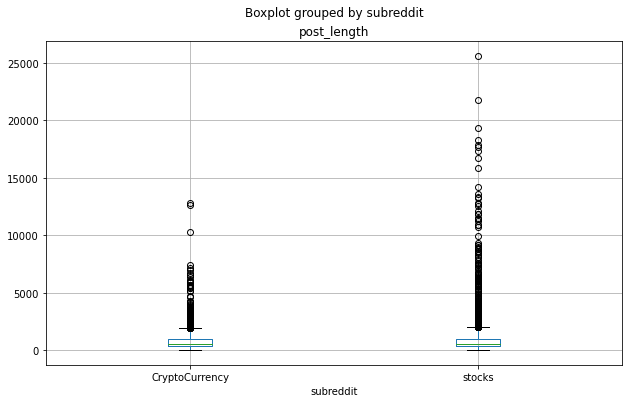

In [46]:
# Plot a boxplot of post_length, groupby 'subreddit'
final_dataset.boxplot(column = 'post_length', by = 'subreddit', figsize = (10,6), showfliers = True)

In [47]:
# Show the summary statistics of post_length
final_dataset['post_length'].groupby(final_dataset['subreddit']).describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
CryptoCurrency,1700.0,865.450000,1005.738326,4.0,343.75,532.0,969.5,12837.0
stocks,1700.0,1186.442353,2196.632622,1.0,319.75,520.0,983.0,25654.0


In [48]:
# Store 'subreddit' = 'stocks' into 'post_length_stocks', store 'subreddit' = 'CryptoCurrency' into 'post_length_crypto'
post_length_stocks = final_dataset.loc[final_dataset['subreddit'] == 'stocks']
post_length_crypto = final_dataset.loc[final_dataset['subreddit'] == 'CryptoCurrency']

C:\Users\chiay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


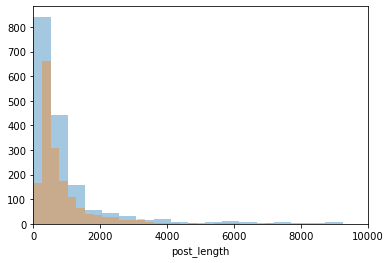

In [49]:
# Distribution plot of both post_length_stocks and post_length_crypto
sns.distplot(post_length_stocks['post_length'], kde=False);
sns.distplot(post_length_crypto['post_length'], kde=False);
plt.xlim(0,10000);   # Set x-limit

The mean and standard deviation of post length by characters is higher for stocks comapred to Cryptocurrency due to presence of more fliers. If we look at median and the different percentile, not much difference between stocks and cryptocurrency.

### To understand the post length of both subreddits by words

In [50]:
# defining a function to find the length of post by characters
def post_length_word(text):
    split_words = text.split(" ")
    return len(split_words)

In [51]:
# Applying the function on 'selftext' and store it in new column 'post_length_word'
final_dataset['post_length_word'] = final_dataset['selftext'].apply(lambda x: post_length_word(x))

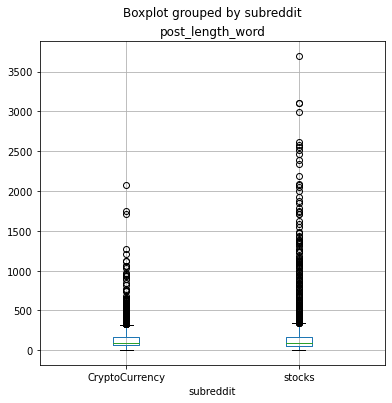

In [52]:
# Plot a boxplot of post_length, groupby 'subreddit'
final_dataset.boxplot(column = 'post_length_word', by = 'subreddit', figsize = (6,6), showfliers = True);

# Save the chart
plt.savefig('../Presentation Slides/Image Used in Slides/Boxplot_postlength_words.png')

In [53]:
# Show the summary statistics of post_length
final_dataset['post_length_word'].groupby(final_dataset['subreddit']).describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
CryptoCurrency,1700.0,147.895882,162.282350,1.0,62.0,94.0,166.25,2070.0
stocks,1700.0,192.181176,338.177007,1.0,56.0,90.0,168.00,3701.0


In [54]:
# Store 'subreddit' = 'stocks' into 'post_length_word_stocks', store 'subreddit' = 'CryptoCurrency' into 'post_length_word_crypto'
post_length_word_stocks = final_dataset.loc[final_dataset['subreddit'] == 'stocks']
post_length_word_crypto = final_dataset.loc[final_dataset['subreddit'] == 'CryptoCurrency']

C:\Users\chiay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


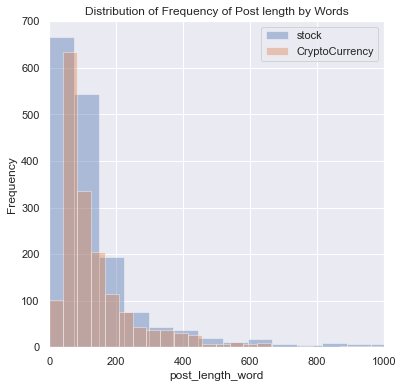

In [55]:
# Distribution plot of both post_length__word_stocks and post_length_word_crypto
sns.set(rc={'figure.figsize':(6,6)})      # Set the figure size to 10 x 10
sns.distplot(post_length_word_stocks['post_length_word'], kde=False, label='stock');
sns.distplot(post_length_word_crypto['post_length_word'], kde=False, label='CryptoCurrency');
plt.legend()        # Plot the legend out
plt.xlim(0,1000);   # Set x-limit
plt.ylabel('Frequency')
plt.title('Distribution of Frequency of Post length by Words')
# Save the chart
plt.savefig('../Presentation Slides/Image Used in Slides/Distribution_postlength_words.png')

The mean and standard deviation of post length by words is higher for stocks comapred to Cryptocurrency due to presence of more fliers. If we look at median and the different percentile, not much difference between stocks and cryptocurrency.

### To understand the effect of posting time towards the post of both subreddit

In [56]:
# defining a function to convert the epoch time to datetime
def date_time(integer):
    return dt.datetime.fromtimestamp(integer).strftime('%c')

In [57]:
# Applying the function on 'created_utc' and store it in new column 'created_utc_datetime'
final_dataset['created_utc_datetime'] = final_dataset['created_utc'].apply(lambda x: date_time(x))

In [58]:
# defining a function to split the month from date_time
def date_time_split_month(string):
    date_time = re.split(r"(\w+)",string)
    return date_time [3]

# defining a function to split the day from date_time
def date_time_split_day(string):
    date_time = re.split(r"(\w+)",string)
    return int(date_time [5])

# defining a function to split the hour from date_time
def date_time_split_hour(string):
    date_time = re.split(r"(\w+)",string)
    return int(date_time [7])

In [59]:
# Applying the functions on 'created_utc_datetime' and store it in new column 'month', 'day', 'hour'
final_dataset['month'] = final_dataset['created_utc_datetime'].apply(lambda x: date_time_split_month(x))
final_dataset['day'] = final_dataset['created_utc_datetime'].apply(lambda x: date_time_split_day(x))
final_dataset['hour'] = final_dataset['created_utc_datetime'].apply(lambda x: date_time_split_hour(x))

In [60]:
#transform dataframe so that it can be easily plotted in seaborn
# Aggregate by 'subreddit','hour', do count, and store it in 'grouped' dataframe
grouped = final_dataset.groupby(['subreddit','hour']).count()

# Only store 1 column (any column also can, in this case 'created_utc')
grouped = grouped [['created_utc']]

# stack the 'grouped' dataframe, reset index and store it into 'grouped_stack'
grouped_stack = pd.DataFrame(grouped.stack()).reset_index()

# Drop 'level_2' column
grouped_stack.drop('level_2', axis = 1, inplace = True)

# Rename the column 0 to 'count'
grouped_stack.rename(columns={0: 'count'}, inplace=True)

# Print 'grouped_stack'
grouped_stack

,subreddit,hour,count
0,CryptoCurrency,0,95
1,CryptoCurrency,1,92
2,CryptoCurrency,2,89
3,CryptoCurrency,3,90
4,CryptoCurrency,4,104
5,CryptoCurrency,5,83
6,CryptoCurrency,6,70
7,CryptoCurrency,7,74
8,CryptoCurrency,8,64
9,CryptoCurrency,9,58


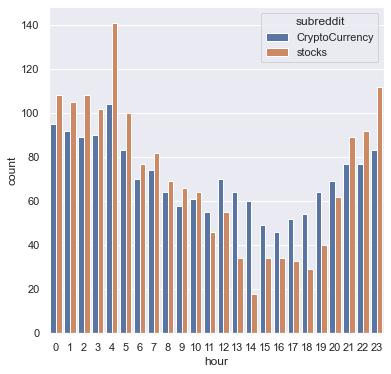

In [61]:
# Plot barplot using seaborn
# x-axis is 'hour', y-axis is 'count', partition by 'subreddit'
sns.barplot(x='hour', y='count', hue='subreddit', data=grouped_stack);
sns.set(rc={'figure.figsize':(15,15)})        # Set the figure size

There is a dip in post for r/stocks between 11-20 hour GMT, and this timing corresponds to night time at US, indicating that a lot of reddit users of r/stocks are from US, and will not be posting since the US market has closed. r/CryptoCurrency on the other hand is more evenly posted across hours as crypto are being traded 24 hours. There is also a slight dip between 11-20 hours, as the US users are sleeping during that timing.

### To understand the most common words appeared

#### Using Word-Vectors Method

In [62]:
# Create feature Matrix X and y
X = final_dataset['title+selftext_clean']    # Save the 'title+selftext_clean' into X
y = final_dataset['subreddit']               # Save the 'subreddit' into y

In [63]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X,
                                   window=5,            # set number of words before and after the focus word that will be considered as context as 5.
                                   min_count=2)         # set number of times word must appear in our corpus in to order to create a word vector to be 2.

In [64]:
# Explore the word vector for "stock" base on our trained model
w2v_model.wv['stock']

array([ 0.42898482, -0.2362591 , -0.04069495, -0.37003952, -0.37588108,
       -0.9264748 ,  0.6378231 ,  0.77778584, -1.3002664 , -0.7476025 ,
        0.45312276, -0.98974496, -0.01680828,  0.3498574 , -0.3257939 ,
       -0.21098983, -0.0735269 , -0.6524015 , -1.4931395 , -1.5186175 ,
        0.5463244 ,  0.37864584, -0.4885353 , -0.34252456,  0.37060705,
        0.44389233,  0.04460849, -0.03414277, -0.65218824,  0.58435494,
        0.5106825 , -0.09846875,  0.38366473, -0.9414597 , -0.7091692 ,
        1.0414344 ,  0.63229793, -0.4798924 , -0.28580222, -1.512417  ,
        0.05245076, -0.40196553, -0.7847938 ,  0.16687457,  0.28253794,
       -0.2664438 , -0.33946276,  0.17761223,  0.5734426 ,  0.5700067 ,
       -0.22602548, -0.2697383 ,  0.09785774, -0.6637828 , -0.4161027 ,
        0.3589598 ,  0.49817976, -0.26381   , -0.7571298 ,  0.34492683,
       -0.3436365 , -0.34707913,  0.01199225, -0.39006633, -0.6162051 ,
        0.8856131 , -0.4128796 , -0.23967925, -0.7129631 ,  1.06

In [65]:
# Find the most similar words to "stock" based on word vectors from our trained model
stock_similar = w2v_model.wv.most_similar('stock')

In [66]:
# Store the info into list
stock_similar_word = []
stock_similar_coefficient = []
for i in range (0,10):
    stock_similar_word.append(stock_similar[i][0])
    stock_similar_coefficient.append(stock_similar[i][1])

In [67]:
# Store the list into dataframe
stock_similar_dataframe = pd.DataFrame([stock_similar_word, stock_similar_coefficient])

In [68]:
# Transpose the dataframe
stock_similar_dataframe = stock_similar_dataframe.T

In [69]:
# Rename the column from 0 to 'word', 1 to 'Word Vector Coefficient'
stock_similar_dataframe.rename(columns={0: 'Word',
                                      1: 'Word Vector Coefficient' }, inplace = True)

In [70]:
# Print the dataframe
stock_similar_dataframe

,Word,Word Vector Coefficient
0,dip,0.969607
1,buying,0.954989
2,sell,0.9332
3,buy,0.933173
4,selling,0.931293
5,eth,0.924792
6,btc,0.920763
7,drop,0.913255
8,call,0.911858
9,otm,0.905581


In [71]:
# Explore the word vector for "cryptocurrency" base on our trained model
w2v_model.wv['crypto']

array([-0.04863219,  0.39297125,  0.47887817,  0.0247599 , -0.3114824 ,
       -0.885428  ,  0.14448872,  1.1355051 , -0.57828635, -0.73624307,
        0.26371977, -1.1343082 , -0.04729411,  0.42305696, -0.02090347,
       -0.6396881 , -0.37865385, -0.35046628, -0.5316749 , -1.2747797 ,
        0.67968297,  0.20804152,  0.30507228,  0.16044468, -0.19236548,
        0.01757544, -0.82100385, -0.720036  , -0.16677682,  0.28414378,
        0.7567035 , -0.0023358 ,  0.5097567 , -0.40306103, -0.8041572 ,
        0.33108464,  0.25416052, -0.7052586 , -0.3736665 , -0.8584368 ,
        0.11751495, -0.35782027, -0.61923015,  0.13953826,  0.11393432,
       -0.4335542 , -0.28467602, -0.2869627 ,  0.6842898 ,  0.62098944,
        0.1240024 , -0.43098226, -0.03817265, -0.8121553 , -0.02362264,
        0.7529563 ,  0.4244496 , -0.62559396, -0.22787087,  0.10337294,
        0.16447878,  0.13049817, -0.0050756 , -0.4694395 , -0.73270065,
        0.53329474, -0.31851664,  0.13437846, -0.7838861 ,  1.38

In [72]:
# Find the most similar words to "cryptocurrency" based on word vectors from our trained model
crypto_similar = w2v_model.wv.most_similar('crypto')

In [73]:
# Store the info into list
crypto_similar_word = []
crypto_similar_coefficient = []
for i in range (0,10):
    crypto_similar_word.append(crypto_similar[i][0])
    crypto_similar_coefficient.append(crypto_similar[i][1])

In [74]:
# Store the list into dataframe
crypto_similar_dataframe = pd.DataFrame([crypto_similar_word, crypto_similar_coefficient])

In [75]:
# Transpose the dataframe
crypto_similar_dataframe = crypto_similar_dataframe.T

In [76]:
# Rename the column from 0 to 'word', 1 to 'Word Vector Coefficient'
crypto_similar_dataframe.rename(columns={0: 'Word',
                                      1: 'Word Vector Coefficient' }, inplace = True)

In [77]:
# Drop the index
crypto_similar_dataframe.reset_index(drop=True, inplace=True)

In [78]:
# Print the dataframe
crypto_similar_dataframe

,Word,Word Vector Coefficient
0,best,0.986832
1,investing,0.986102
2,everyone,0.983937
3,curious,0.983811
4,sure,0.983641
5,hey,0.982573
6,wrong,0.981926
7,someone,0.981568
8,idea,0.981213
9,trying,0.980777


#### Using N-Gram Method

In [79]:
# To use N-Gram, it requires a full sentence to be passed in as opposed to a tokenized list
# Define a function to join back the list of words
def join_clean_text(list):
    text = " ".join(list)
    return text

In [80]:
# Applying the function on 'selftext' and store it in new column 'post_length_word'
final_dataset['title+selftext_clean_joined'] = final_dataset['title+selftext_clean'].apply(lambda x: join_clean_text(x))

In [81]:
# Divide final_dataset into 2 df of 'stocks' and 'crypto'
final_dataset_stocks = final_dataset[final_dataset['subreddit'] == 'stocks']
final_dataset_crypto = final_dataset[final_dataset['subreddit'] == 'CryptoCurrency']

#### 1 x 1 N-Gram - 'Stocks' Subreddit

In [82]:
# Do a count vectorizer with a parameter of 1 by 1, unigram.
ngram_vect = CountVectorizer(ngram_range=(1,1))
# Transform the 'title_selftext+clean_joined' in 'stocks' into a sparse matrix 
X_counts = ngram_vect.fit_transform(final_dataset_stocks['title+selftext_clean_joined'])

# 'Stocks' dataset has 15,201 unique 1-word
print(X_counts.shape)

(1700, 15201)


In [83]:
# Sum all the rows of 'X_counts' to 1 row, and store it in a data frame 'X_counts_df'
X_counts_df = pd.DataFrame(X_counts.sum(axis=0))

# Rename the columns with the words
X_counts_df.columns = ngram_vect.get_feature_names()

# Print a few rows of'X_counts_df'
X_counts_df.head()

,aa,aaaand,aabaesc,aagilent,aaii,aal,aapl,aaplmsft,aapls,aaron,...,zone,zonezonetail,zoom,zscaler,ztna,zuckerberg,zuckerbergs,zucks,zvia,zzillow
0,1,1,1,1,7,5,78,1,2,2,...,2,1,15,6,1,1,1,1,1,1


In [84]:
# Transpose the 'X_counts_df' and store in 'X_counts_df_transposed'
X_counts_df_transposed = X_counts_df.T

In [85]:
# Print a few rows of "X_counts_df_transposed"
X_counts_df_transposed.head()

,0
aa,1
aaaand,1
aabaesc,1
aagilent,1
aaii,7


In [86]:
# Rename the column from 0 to 'count'
X_counts_df_transposed.rename(columns={0: 'count'}, inplace = True)

In [87]:
# Sort the dataframe by 'count' in descending order
X_counts_df_transposed = X_counts_df_transposed.sort_values(by = 'count', ascending = False)

In [88]:
# Print a few rows of "X_counts_2_df_transposed"
X_counts_df_transposed.head()

,count
stock,2761
company,1853
market,1526
price,1493
year,1279


In [89]:
# Store the top 20 2-word combinations into 'X_counts_df_transposed_top20'
X_counts_df_transposed_top20 = X_counts_df_transposed.head(20)

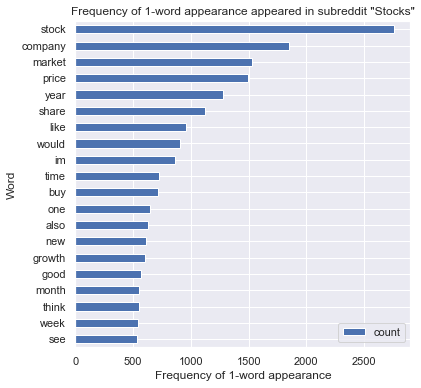

In [90]:
# Plot the horizontal bar chart 
ax = X_counts_df_transposed_top20.plot(kind='barh', figsize = (6,6))
ax.invert_yaxis()          # Invert the y-axis from more to less
plt.xlabel('Frequency of 1-word appearance')
plt.ylabel('Word')
plt.title('Frequency of 1-word appearance appeared in subreddit "Stocks"')
# Save the chart
plt.savefig('../Presentation Slides/Image Used in Slides/Barchart_word_stocks.png')

#### 1 x 1 N-Gram - 'CryptoCurrency' Subreddit

In [91]:
# Do a count vectorizer with a parameter of 1 by 1, unigram.
ngram_vect = CountVectorizer(ngram_range=(1,1))
# Transform the 'title_selftext+clean_joined' in 'stocks' into a sparse matrix 
X_counts = ngram_vect.fit_transform(final_dataset_crypto['title+selftext_clean_joined'])

# 'Stocks' dataset has 11,795 unique 1-word
print(X_counts.shape)

(1700, 11802)


In [92]:
# Sum all the rows of 'X_counts' to 1 row, and store it in a data frame 'X_counts_df'
X_counts_df = pd.DataFrame(X_counts.sum(axis=0))

# Rename the columns with the words
X_counts_df.columns = ngram_vect.get_feature_names()

# Print a few rows of'X_counts_df'
X_counts_df.head()

,aa,aaa,aaaaand,aaab,aaand,aave,aavecompound,aavegotchi,abandon,abandoned,...,zilliqa,zillqa,zilpay,zimbabwe,zone,zoo,zoom,zooming,zug,zynga
0,4,4,1,1,1,13,1,1,1,4,...,2,1,1,1,1,2,13,4,1,1


In [93]:
# Transpose the 'X_counts_df' and store in 'X_counts_df_transposed'
X_counts_df_transposed = X_counts_df.T

In [94]:
# Print a few rows of "X_counts_df_transposed"
X_counts_df_transposed.head()

,0
aa,4
aaa,4
aaaaand,1
aaab,1
aaand,1


In [95]:
# Rename the column from 0 to 'count'
X_counts_df_transposed.rename(columns={0: 'count'}, inplace = True)

In [96]:
# Sort the dataframe by 'count' in descending order
X_counts_df_transposed = X_counts_df_transposed.sort_values(by = 'count', ascending = False)

In [97]:
# Print a few rows of "X_counts_2_df_transposed"
X_counts_df_transposed.head()

,count
crypto,2045
market,1148
coin,1086
im,978
like,972


In [98]:
# Store the top 20 2-word combinations into 'X_counts_df_transposed_top20'
X_counts_df_transposed_top20 = X_counts_df_transposed.head(20)

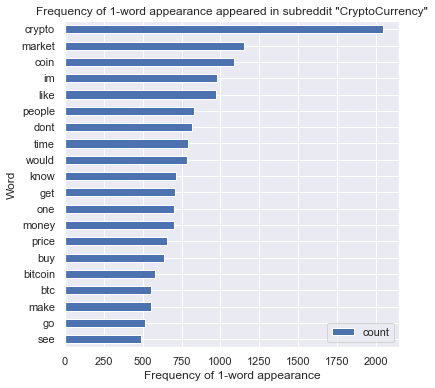

In [99]:
# Plot the horizontal bar chart 
ax = X_counts_df_transposed_top20.plot(kind='barh', figsize = (6,6))
ax.invert_yaxis()          # Invert the y-axis from more to less
plt.xlabel('Frequency of 1-word appearance')
plt.ylabel('Word')
plt.title('Frequency of 1-word appearance appeared in subreddit "CryptoCurrency"')
# Save the chart
plt.savefig('../Presentation Slides/Image Used in Slides/Barchart_word_crypto.png')

#### 2 x 2 N-Gram - 'Stocks' Subreddit

In [100]:
# Do a count vectorizer with a parameter of 2 by 2, bigram.
ngram_vect = CountVectorizer(ngram_range=(2,2))
# Transform the 'title_selftext+clean_joined' in 'stocks' into a sparse matrix 
X_counts_2 = ngram_vect.fit_transform(final_dataset_stocks['title+selftext_clean_joined'])

# 'Stocks' dataset has 131,234 unique 2-word combination
print(X_counts_2.shape)

(1700, 131234)


In [101]:
# Sum all the rows of 'X_counts_2' to 1 row, and store it in a data frame 'X_counts_2_df'
X_counts_2_df = pd.DataFrame(X_counts_2.sum(axis=0))

# Rename the columns with the words
X_counts_2_df.columns = ngram_vect.get_feature_names()

# Print a few rows of'X_counts_2_df'
X_counts_2_df.head()

,aa new,aaaand fed,aabaesc worth,aagilent technology,aaii investor,aaii saw,aaii survey,aaii weekly,aal airline,aal delta,...,zscaler needham,zscaler piper,zscaler target,zscaler vlad,ztna product,zuckerberg subpoenaed,zuckerbergs idea,zucks playbook,zvia price,zzillow average
0,1,1,1,1,1,1,4,1,1,1,...,1,1,2,1,1,1,1,1,1,1


In [102]:
# Transpose the 'X_counts_2_df' and store in 'X_counts_2_df_transposed'
X_counts_2_df_transposed = X_counts_2_df.T

In [103]:
# Print a few rows of "X_counts_2_df_transposed"
X_counts_2_df_transposed.head()

,0
aa new,1
aaaand fed,1
aabaesc worth,1
aagilent technology,1
aaii investor,1


In [104]:
# Rename the column from 0 to 'count'
X_counts_2_df_transposed.rename(columns={0: 'count'}, inplace = True)

In [105]:
# Sort the dataframe by 'count' in descending order
X_counts_2_df_transposed = X_counts_2_df_transposed.sort_values(by = 'count', ascending = False)

In [106]:
# Print a few rows of "X_counts_2_df_transposed"
X_counts_2_df_transposed.head()

,count
price target,257
long term,193
stock currently,173
currently around,164
market cap,153


In [107]:
# Store the top 20 2-word combinations into 'X_counts_2_df_transposed_top20'
X_counts_2_df_transposed_top20 = X_counts_2_df_transposed.head(20)

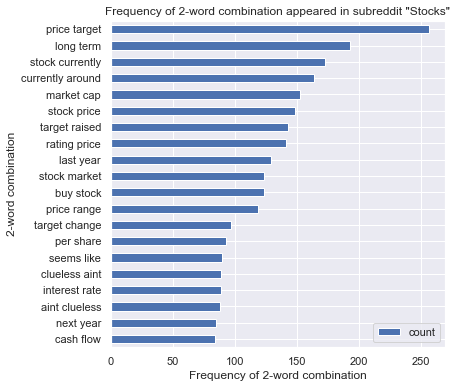

In [108]:
# Plot the horizontal bar chart 
ax = X_counts_2_df_transposed_top20.plot(kind='barh', figsize = (6,6))
ax.invert_yaxis()          # Invert the y-axis from more to less
plt.xlabel('Frequency of 2-word combination')
plt.ylabel('2-word combination')
plt.title('Frequency of 2-word combination appeared in subreddit "Stocks"')
# Save the chart
plt.savefig('../Presentation Slides/Image Used in Slides/Barchart_2word_stocks.png')

#### 2 x 2 N-Gram - 'CryptoCurrency' Subreddit

In [109]:
# Do a count vectorizer with a parameter of 2 by 2, bigram.
ngram_vect = CountVectorizer(ngram_range=(2,2))
# Transform the 'title_selftext+clean_joined' in 'stocks' into a sparse matrix 
X_counts_2 = ngram_vect.fit_transform(final_dataset_crypto['title+selftext_clean_joined'])

# 'Crypto' dataset has 100,377 unique 2-word combination
print(X_counts_2.shape)

(1700, 100473)


In [110]:
# Sum all the rows of 'X_counts_2' to 1 row, and store it in a data frame 'X_counts_2_df'
X_counts_2_df = pd.DataFrame(X_counts_2.sum(axis=0))

# Rename the columns with the words
X_counts_2_df.columns = ngram_vect.get_feature_names()

# Print a few rows of'X_counts_2_df'
X_counts_2_df.head()

,aa aa,aa coin,aaa aaab,aaa form,aaa game,aaa title,aaaaand im,aaab baac,aaand important,aave aave,...,zoom lucky,zoom outthe,zoom theyll,zoom way,zoom whats,zooming brings,zooming help,zooming show,zug switzerland,zynga worked
0,3,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1


In [111]:
# Transpose the 'X_counts_2_df' and store in 'X_counts_2_df_transposed'
X_counts_2_df_transposed = X_counts_2_df.T

In [112]:
# Print a few rows of "X_counts_2_df_transposed"
X_counts_2_df_transposed.head()

,0
aa aa,3
aa coin,1
aaa aaab,1
aaa form,1
aaa game,1


In [113]:
# Rename the column from 0 to 'count'
X_counts_2_df_transposed.rename(columns={0: 'count'}, inplace = True)

In [114]:
# Sort the dataframe by 'count' in descending order
X_counts_2_df_transposed = X_counts_2_df_transposed.sort_values(by = 'count', ascending = False)

In [115]:
# Print a few rows of "X_counts_2_df_transposed"
X_counts_2_df_transposed.head()

,count
gtpoplt gtpoplt,299
bear market,258
bull run,107
dont know,100
btc eth,97


In [116]:
# Store the top 20 2-word combinations into 'X_counts_2_df_transposed_top20'
X_counts_2_df_transposed_top20 = X_counts_2_df_transposed.head(20)

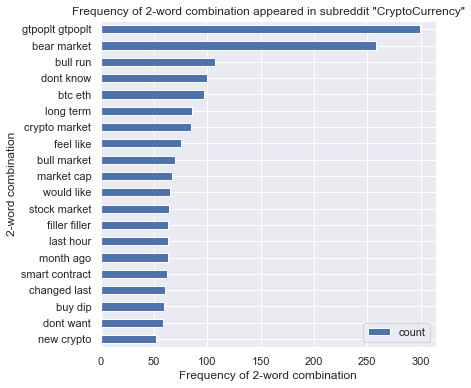

In [117]:
# Plot the horizontal bar chart 
ax = X_counts_2_df_transposed_top20.plot(kind='barh', figsize = (6,6))
ax.invert_yaxis()          # Invert the y-axis from more to less
plt.xlabel('Frequency of 2-word combination')
plt.ylabel('2-word combination')
plt.title('Frequency of 2-word combination appeared in subreddit "CryptoCurrency"')
# Save the chart
plt.savefig('../Presentation Slides/Image Used in Slides/Barchart_2word_crypto.png')

### Save the dataset for Part 2

In [118]:
# Export the final dataset into csv again
final_dataset.to_csv("../Excel/Final Dataset.csv", index = False)